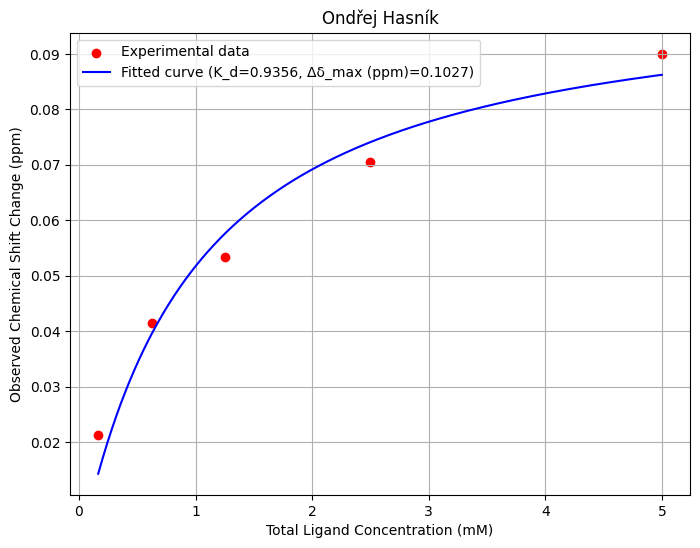

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def delta_obs(L, P, K_d, delta_max):
    term1 = (P + L + K_d)
    term2 = np.sqrt(term1**2 - 4 * P * L)
    delta_obs_value = delta_max * (term1 - term2) / (2 * P)
    return delta_obs_value

L_values = np.array([0.165, 0.625, 1.250, 2.500, 5.000])

P = 0.1  

delta_obs_values = np.array([0.021234, 0.041444, 0.053381, 0.070571, 0.090052])

initial_guess = [1.0, 0.1]

popt, pcov = curve_fit(lambda L, K_d, delta_max: delta_obs(L, P, K_d, delta_max),
                       L_values, delta_obs_values, p0=initial_guess)
K_d_fit, delta_max_fit = popt

fitted_delta_obs = delta_obs(L_values, P, K_d_fit, delta_max_fit)

L_smooth = np.linspace(min(L_values), max(L_values), 500)
fitted_delta_obs_smooth = delta_obs(L_smooth, P, K_d_fit, delta_max_fit)

plt.figure(figsize=(8, 6))
plt.scatter(L_values, delta_obs_values, color='red', label='Experimental data')
plt.plot(L_smooth, fitted_delta_obs_smooth, 
         label=f'Fitted curve (K_d={K_d_fit:.4f}, Δδ_max (ppm)={delta_max_fit:.4f})', 
         color='blue')
plt.xlabel('Total Ligand Concentration (mM)')
plt.ylabel('Observed Chemical Shift Change (ppm)')
plt.title('Ondřej Hasník')
plt.legend()
plt.grid(True)
plt.show()
